In [8]:
!pip install requests pandas geopandas matplotlib transformers torch


In [9]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from transformers import pipeline


In [34]:
news_sources = {
    'BBC News': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'CNN': {'latitude': 33.7490, 'longitude': -84.3880},     # Atlanta
    'Reuters': {'latitude': 40.7128, 'longitude': -74.0060}, # New York
    'Al Jazeera': {'latitude': 25.276987, 'longitude': 51.520008},  # Doha
    'Associated Press': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Guardian': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'NBC News': {'latitude': 40.7580, 'longitude': -73.9855},  # New York
    'Forbes': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Sky News': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'Bloomberg': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The New York Times': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Washington Post': {'latitude': 38.8951, 'longitude': -77.0364},  # Washington, D.C.
    'Fox News': {'latitude': 40.7580, 'longitude': -73.9855},  # New York
    'USA Today': {'latitude': 38.8951, 'longitude': -77.0364},  # Washington, D.C.
    'HuffPost': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Times': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'The Independent': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'Financial Times': {'latitude': 51.5115, 'longitude': -0.1182},  # London
    'Deutsche Welle': {'latitude': 50.1109, 'longitude': 8.6821},  # Bonn
    'The Telegraph': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'National Public Radio (NPR)': {'latitude': 38.8951, 'longitude': -77.0364},  # Washington, D.C.
    'Reuters TV': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Wired': {'latitude': 37.7749, 'longitude': -122.4194},  # San Francisco
    'Vice News': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Hill': {'latitude': 38.8951, 'longitude': -77.0364},  # Washington, D.C.
    'Politico': {'latitude': 38.8951, 'longitude': -77.0364},  # Washington, D.C.
    'Bloomberg News': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'ABC News': {'latitude': 40.7580, 'longitude': -73.9855},  # New York
    'CBS News': {'latitude': 40.7580, 'longitude': -73.9855},  # New York
    'The Atlantic': {'latitude': 42.3601, 'longitude': -71.0589},  # Boston
    'Slate': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Verge': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Mashable': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'CNET': {'latitude': 37.7749, 'longitude': -122.4194},  # San Francisco
    'Gizmodo': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Engadget': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Hacker News': {'latitude': 37.7749, 'longitude': -122.4194},  # San Francisco
    'BuzzFeed': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Ringer': {'latitude': 34.0522, 'longitude': -118.2437},  # Los Angeles
    'Fortune': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'New York Post': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'Newsweek': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The New Yorker': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Daily Beast': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Spectator': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'Le Monde': {'latitude': 48.8566, 'longitude': 2.3522},  # Paris
    'The Guardian US': {'latitude': 40.7128, 'longitude': -74.0060},  # New York
    'The Sun': {'latitude': 51.5074, 'longitude': -0.1278},  # London
    'The Times of India': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'The Hindu': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'India Today': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'Economic Times': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'NDTV': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'Zee News': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'Hindustan Times': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'Dainik Jagran': {'latitude': 28.6139, 'longitude': 77.2090},  # Delhi
    'The Express Tribune': {'latitude': 30.3753, 'longitude': 69.3451},  # Islamabad
    'The Nation': {'latitude': 33.6844, 'longitude': 73.0479},  # Islamabad
    'DAWN': {'latitude': 24.8607, 'longitude': 67.0011},  # Karachi
    'The Jakarta Post': {'latitude': -6.2000, 'longitude': 106.8451},  # Jakarta
    'South China Morning Post': {'latitude': 22.3964, 'longitude': 114.1095},  # Hong Kong
    'China Daily': {'latitude': 39.9042, 'longitude': 116.4074},  # Beijing
    'The Straits Times': {'latitude': 1.3521, 'longitude': 103.8198},  # Singapore
    'The Japan Times': {'latitude': 35.6762, 'longitude': 139.6503},  # Tokyo
    'The Korea Times': {'latitude': 37.5665, 'longitude': 126.9780},  # Seoul
    'The Globe and Mail': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'National Post': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'CBC News': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'CTV News': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'The Toronto Star': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'Global News': {'latitude': 43.6532, 'longitude': -79.3832},  # Toronto
    'News24': {'latitude': -26.2041, 'longitude': 28.0473},  # Johannesburg
    'SABC News': {'latitude': -26.2041, 'longitude': 28.0473},  # Johannesburg
    'Mail & Guardian': {'latitude': -26.2041, 'longitude': 28.0473},  # Johannesburg
    'Al-Ahram': {'latitude': 30.0444, 'longitude': 31.2357},  # Cairo
    'Arab News': {'latitude': 24.7136, 'longitude': 46.6753},  # Riyadh
    'Al-Monitor': {'latitude': 38.9637, 'longitude': 35.2433},  # Istanbul
    'The National': {'latitude': 24.4539, 'longitude': 54.3773},  # Abu Dhabi
    'The Times of Malta': {'latitude': 35.9375, 'longitude': 14.3754},  # Valletta
}



In [35]:
def fetch_news(api_key, sources, keyword):
    sources_str = ','.join(sources)
    url = f'https://newsapi.org/v2/everything?q={keyword}&sources={sources_str}&apiKey={api_key}&language=en'
    response = requests.get(url)
    return response.json()['articles']


In [36]:
!pip install numpy

import numpy as np # Imports the numpy library and assigns it to the variable np

def analyze_sentiment(articles):
    sentiments = {}
    for article in articles:
        sentiments[article['source']['name']] = np.random.uniform(-1, 1)  # Random sentiment score
    return sentiments


In [37]:
api_key = '4fe9a95399284d77923cf60d165594bc'  # Replace with your NewsAPI key
keyword = "India"  # Replace with your specific keyword


In [31]:
news_articles = fetch_news(api_key, news_sources.keys(), keyword)
sentiments = analyze_sentiment(news_articles)


<Figure size 1200x800 with 0 Axes>

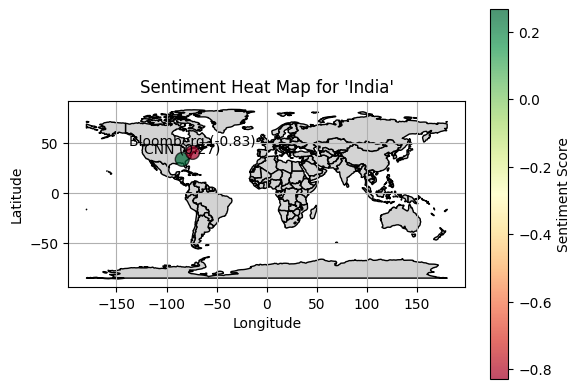

In [45]:
# Assuming 'sentiments' is a dictionary with news sources as keys and their sentiment scores as values

# Prepare the heatmap data using actual sentiment values
heatmap_data = []
for source in news_sources.keys():
    if source in sentiments:  # Only include sources present in sentiments
        lat = news_sources[source]['latitude']
        long = news_sources[source]['longitude']
        sentiment = sentiments[source]
        heatmap_data.append({'source': source, 'latitude': lat, 'longitude': long, 'sentiment': sentiment})

# Create a DataFrame for heat map
heatmap_df = pd.DataFrame(heatmap_data)

# Load the world map directly from a reliable GeoJSON URL
world = gpd.read_file("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")

# Plot the world map
plt.figure(figsize=(12, 8))
world.plot(color='lightgrey', edgecolor='black')

# Scatter plot for sentiment
plt.scatter(heatmap_df['longitude'], heatmap_df['latitude'],
            c=heatmap_df['sentiment'],
            cmap='RdYlGn',
            s=100, edgecolor='k', alpha=0.7)

plt.title(f"Sentiment Heat Map for '{keyword}'")
plt.colorbar(label='Sentiment Score')

# Annotate the points
for index, row in heatmap_df.iterrows():
    plt.annotate(f"{row['source']} ({row['sentiment']:.2f})",
                 (row['longitude'], row['latitude']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


<Figure size 1200x800 with 0 Axes>

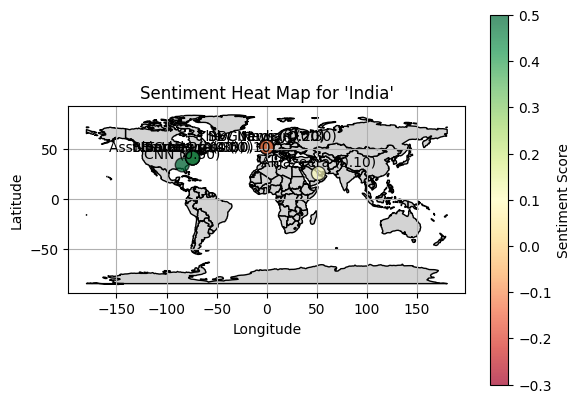